# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)  
[19_Exercise_Skill_Pay_Analysis.ipynb](../2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_I = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy() 


In [3]:
df_DA_I['job_posted_month_no'] = df_DA_I['job_posted_date'].dt.month

In [4]:
df_DA_I_explode = df_DA_I.explode('job_skills')


In [5]:
df_DA_I_pivot = df_DA_I_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_DA_I_pivot.loc['Total'] = df_DA_I_pivot.sum()

df_DA_I_pivot = df_DA_I_pivot[df_DA_I_pivot.loc['Total'].sort_values(ascending = False).index]

df_DA_I_pivot = df_DA_I_pivot.drop('Total')


In [6]:
DA_totals = df_DA_I.groupby('job_posted_month_no').size()


In [7]:
df_DA_I_percent = df_DA_I_pivot.div(DA_totals/100, axis = 0)
df_DA_I_percent = df_DA_I_percent.reset_index()
df_DA_I_percent['job_posted_month'] = df_DA_I_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_I_percent.set_index('job_posted_month', inplace = True)
df_DA_I_percent.drop(columns = 'job_posted_month_no')

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.694444,0.000000
Feb,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000
Mar,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,0.000000,1.030928,1.030928,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Apr,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
May,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jun,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jul,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.000000,1.086957,0.00000,0.000000,0.000000,0.000000,0.000000
Aug,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Sep,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000


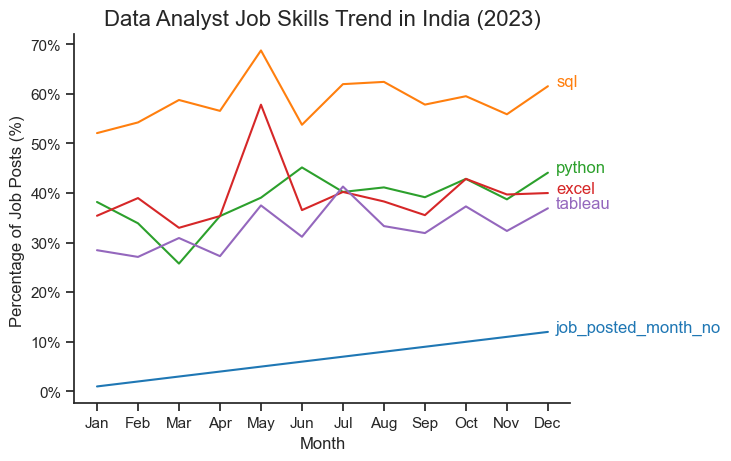

In [9]:
df_plot = df_DA_I_percent.iloc[:, :5]

sns.lineplot(data = df_plot, dashes = False, palette= 'tab10')
sns.set_theme(style = 'ticks')
sns.despine()
plt.title('Data Analyst Job Skills Trend in India (2023)', fontsize = 16)
plt.ylabel('Percentage of Job Posts (%) ', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.legend().remove()


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], horizontalalignment = 'left', size = 'medium', color = plt.gca().lines[i].get_color(), weight = 'normal')

plt.show()